In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
X = pd.read_csv('Data/PCA_HR_Employee.csv')
Y = pd.read_csv('Data/Attrition.csv')

In [3]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
print(X_Train.shape, Y_Train.shape)
print(X_Test.shape, Y_Test.shape)

(1176, 29) (1176, 1)
(294, 29) (294, 1)


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_Train)
X_test_ss = ss.transform(X_Test)
naive_bayes_clf = GaussianNB()

In [5]:
naive_bayes_clf.fit(X_Train, Y_Train)
train_pred = naive_bayes_clf.predict(X_Train)
train_accuracy = metrics.accuracy_score(Y_Train, train_pred)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [6]:
train_accuracy

0.8375850340136054

In [7]:
test_pred = naive_bayes_clf.predict(X_Test)
test_accuracy = metrics.accuracy_score(Y_Test, test_pred)

In [8]:
test_accuracy

0.7619047619047619

In [9]:
tn, fp, fn, tp = metrics.confusion_matrix(y_true = Y_Test, y_pred = test_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2

print("For the testing set : ")
print(" The actual recall is : ",recall,"\n","The actual precision is : ",precision,"\n","The actual specificity is : ",specificity,"\n","The f1 score is : ",f1,"\n","The balanced accuracy is : ", balanced_accuracy)

For the testing set : 
 The actual recall is :  0.3409090909090909 
 The actual precision is :  0.26785714285714285 
 The actual specificity is :  0.836 
 The f1 score is :  0.3 
 The balanced accuracy is :  0.5884545454545455


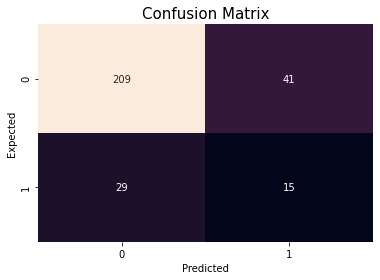

In [10]:
cm_plot =  pd.crosstab(index=Y_Test.values.ravel(), columns=test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()